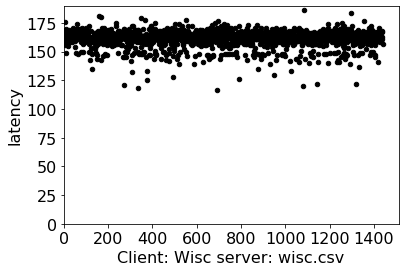

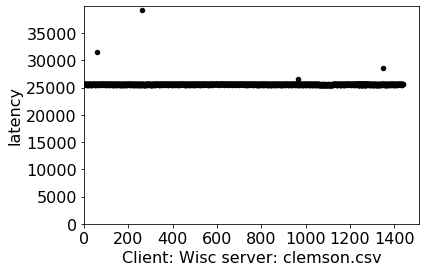

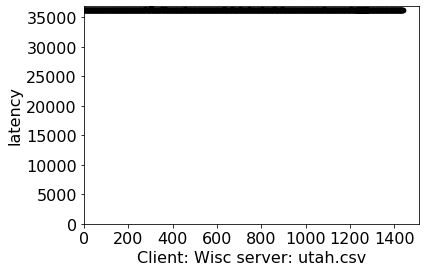

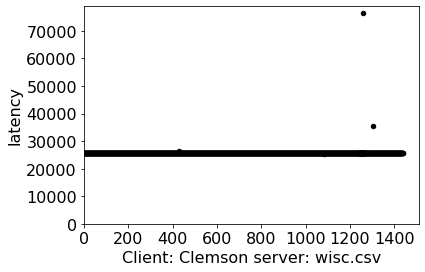

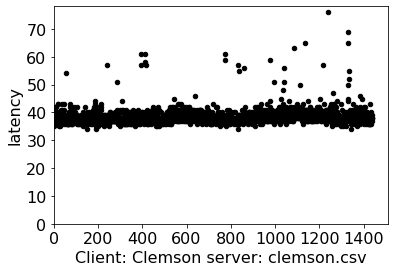

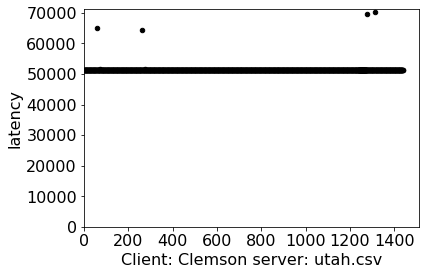

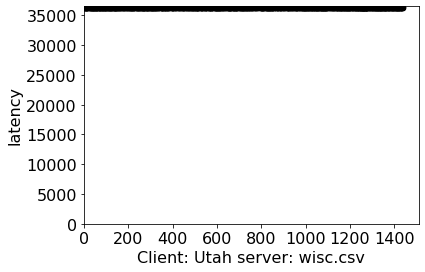

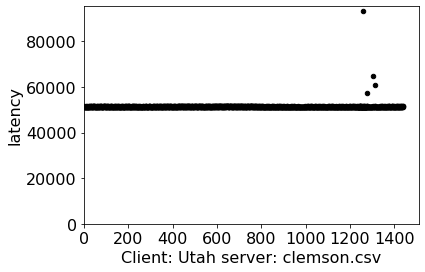

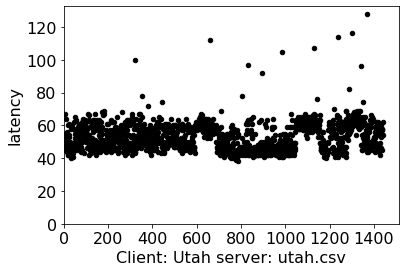

In [23]:
import csv
import os

import pandas as pd
%matplotlib inline
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

def parse_data(data):
    x = []
    y = []
    for point in data:
        split_val = point.split(',')
        time = split_val[0].split()[1].split(':')[:2]
        time_val = int(time[0])*60 + int(time[1])
        latency = float(split_val[2])*1000
        x.append(time_val)
        y.append(latency)
    return x, y
        

file_names = ['wisc.csv', 'clemson.csv', 'utah.csv']
setups = ['Wisc', 'Clemson', 'Utah']
for setup in setups:
    for file_name in file_names:
        with open(os.path.join('Stats',setup, file_name)) as f:
            data = list(f)
            x, y = parse_data(data)
            xlabell = 'Client: ' + setup + ' server: ' + file_name
            scatter(x, y, xlabel=xlabell, ylabel="latency")